In [22]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Categorising data into 'S', 'M', 'L' clusters

In [2]:
df = pd.read_csv("../dataset/weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


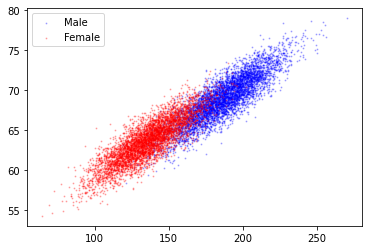

In [3]:
color_dict = {'Female':'red','Male':'blue'}

for gender in df.Gender.unique():
    g_df = df[df.Gender == gender]
    plt.scatter(g_df.Weight,g_df.Height,color=color_dict[gender],label=gender,s=1,alpha=0.25)
    # alpha : for opacity, s : sizing
plt.legend()
plt.show()

Observation :
Males are generally Taller and stronger than Women

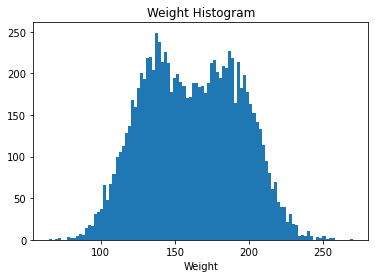

In [12]:
plt.hist(df.Weight, bins=100)
plt.xlabel("Weight")
plt.title("Weight Histogram")
plt.show()

It's a bimodal plot i.e. 2 peak.

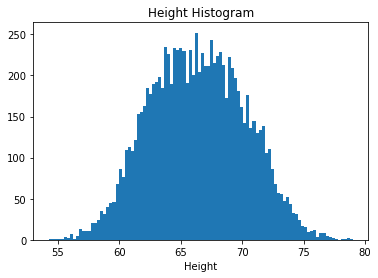

In [13]:
plt.hist(df.Height, bins=100)
plt.xlabel("Height")
plt.title("Height Histogram")
plt.show()

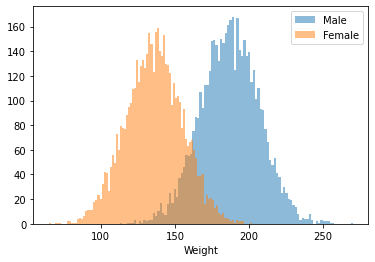

In [21]:
for gender in df.Gender.unique():
    g_df = df[df['Gender']==gender]
    plt.hist(g_df.Weight, label = gender, bins=100,alpha=0.5)
plt.xlabel("Weight")
plt.legend()
plt.show()

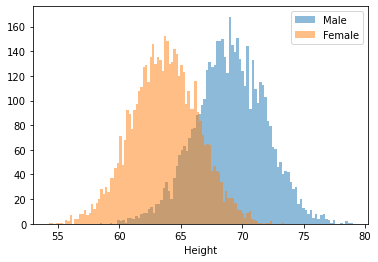

In [20]:
for gender in df.Gender.unique():
    g_df = df[df['Gender']==gender]
    plt.hist(g_df.Height, label = gender, bins=100,alpha=0.5)
plt.xlabel("Height")
plt.legend()
plt.show()

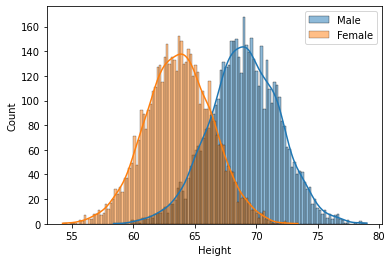

In [25]:
colors={"Male":"C0","Female":"C1"}
for gender in df.Gender.unique():
    g_df = df[df['Gender']==gender]
    sns.histplot(g_df.Height, label = gender, bins=100,alpha=0.5,kde=True,color=colors[gender])
plt.xlabel("Height")
plt.legend()
plt.show()

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=99)
kmeans.fit(df.iloc[:,1:]) # Skipping gender column

KMeans(n_clusters=4, random_state=99)

In [5]:
kmeans.labels_

array([2, 1, 2, ..., 3, 1, 3], dtype=int32)

In [6]:
kmeans.cluster_centers_   # Each refers to 'S','M','L','XL'

array([[ 64.64516001, 145.01478856],
       [ 67.82476755, 175.95023927],
       [ 71.27283662, 205.05033919],
       [ 61.48314899, 117.38137244]])

In [7]:
# Checking if 4 is correct value
inertia = pd.DataFrame(data=[],index=range(2,21),columns=['inertia'])
for n_clusters in range(2,21):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df.iloc[:,1:])
    inertia.loc[n_clusters] = kmeans.inertia_
    
inertia.head()

,inertia
2,2936531.68683
3,1565900.765264
4,956672.233956
5,654984.292
6,484337.652985


In [8]:
inertia.head()

,inertia
2,2936531.68683
3,1565900.765264
4,956672.233956
5,654984.292
6,484337.652985


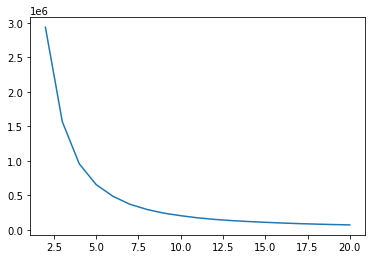

In [9]:
plt.plot(range(2,21),inertia['inertia'])

We see a bend almost in the range 4-6 and thus numbere of clusters in that range would be the best value.

## Handling outliers
Bringing everything on Normal Distribution

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.iloc[:,1:])
sdf = scaler.transform(df.iloc[:,1:])

In [27]:
kmeans=KMeans(n_clusters=6, random_state=0)
kmeans.fit(sdf)

KMeans(n_clusters=6, random_state=0)

In [28]:
kmeans.cluster_centers_

array([[-0.27139437, -0.3431941 ],
       [ 1.67095113,  1.58670648],
       [-1.61348837, -1.56393187],
       [ 0.88926882,  0.95273195],
       [-0.87798118, -0.91946473],
       [ 0.27595235,  0.34627162]])

In [29]:
# Putting back in regular space
scaler.inverse_transform(kmeans.cluster_centers_)

array([[ 65.32341448, 150.421481  ],
       [ 72.79626974, 212.3844776 ],
       [ 60.1599283 , 111.22745645],
       [ 69.78887545, 192.02956295],
       [ 62.9896714 , 131.91925571],
       [ 67.42924109, 172.55804197]])

## Plotting the cluster centers